# Chapter 9: Unsupervised Learning Techniques

In [1]:
import numpy as np
import pandas as pd
import sklearn 

sklearn.__version__

'1.3.2'

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [3]:
from pathlib import Path

IMAGES_PATH = Path("images")

## Clustering Algorithms: k-means and DBSCAN

### K-means

In [4]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

#exact arguments of make_blobs() are not important
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

k = 5
kmeans = KMeans(n_clusters=k, n_init=10, random_state=45)
y_pred = kmeans.fit_predict(X)

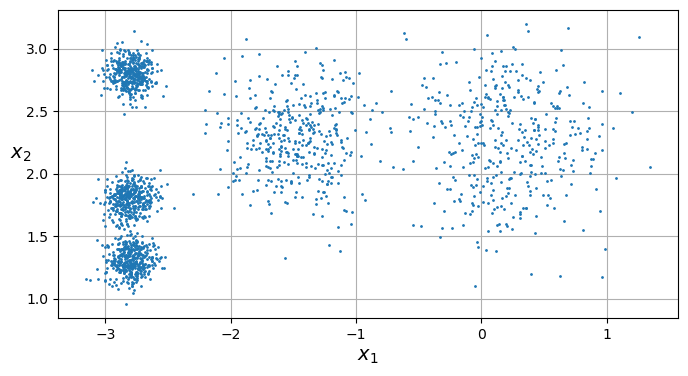

In [5]:

def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.gca().set_axisbelow(True)
plt.grid()
plt.show()

In [6]:
y_pred, y_pred is kmeans.labels_

(array([4, 0, 1, ..., 3, 1, 0]), True)

In [7]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

In [8]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3])

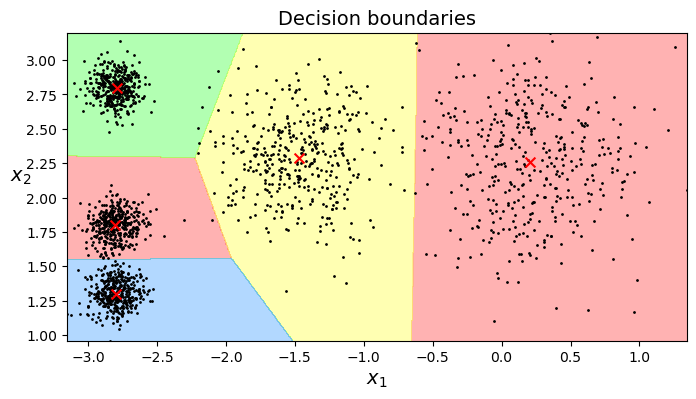

In [9]:
from matplotlib.colors import ListedColormap

# Clusters decision boundaries
def plot_data(X):
	plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2, zorder=-1)

	
def plot_decision_boundaries(clusterer, X, resolution=1000, custom_map=None, show_centroids=True):
	
	min_x1, max_x1 = X[:, 0].min(), X[:, 0].max()
	min_x2, max_x2 = X[:, 1].min(), X[:, 1].max()

	x1, x2 = np.meshgrid(np.linspace(min_x1, max_x1, resolution), np.linspace(min_x2, max_x2, resolution))
	X_new = np.c_[x1.ravel(), x2.ravel()]

	y_pred = clusterer.predict(X_new).reshape(x1.shape)
	plt.contourf(x1, x2, y_pred, alpha=0.5, cmap=custom_map, zorder=-1)
	
	plot_data(X)

	if show_centroids:
		plt.scatter(clusterer.cluster_centers_[:, 0], clusterer.cluster_centers_[:, 1], s=50, marker='x', color='r', zorder=10)

	
custom_map = ListedColormap(['#ff6666', '#ffb366', '#ffff66', '#66ff66', '#66b3ff'])

plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X, custom_map=custom_map)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.title("Decision boundaries")
plt.show()

#### K-Means Variability

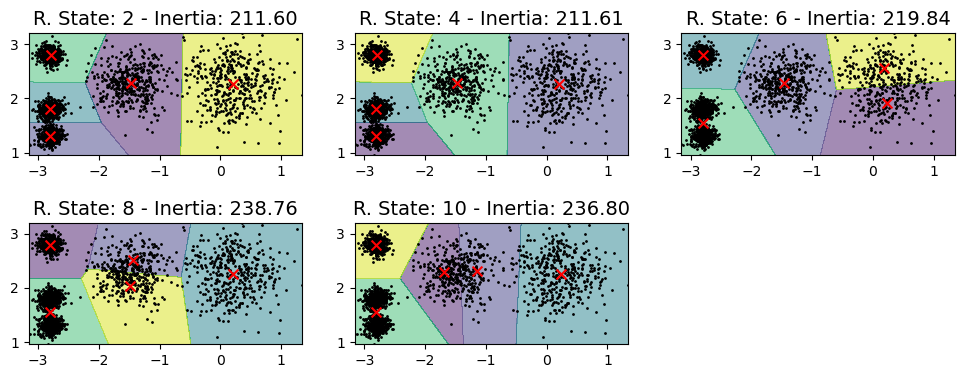

In [35]:
# Different random initializations lead to different outcomes
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)
n_clusters = 5
n_init = 2
init="random"

plt.figure(figsize=(10, 4))


for i in range(2, 11, 2):
    clusterer = KMeans(n_clusters=n_clusters, init=init, n_init=n_init, random_state=i)
    clusterer.fit(X)
    plt.subplot(2, 3, i // 2)
    plot_decision_boundaries(clusterer, X)
    inertia = clusterer.inertia_
    plt.title(f"R. State: {i} - Inertia: {inertia:.2f}")


plt.tight_layout()
plt.show()


In [10]:
# Distances to the centroids
# Clusters:  					C0, C1, C2, C3, C4
# Instances 1 - Distances: 		D0, D1, D2, D3, D4
# Instances 2 - Distances: 		D0, D1, D2, D3, D4
kmeans.transform(X_new).round(2)

array([[2.81, 0.33, 1.49, 2.9 , 2.89],
       [5.81, 2.8 , 4.48, 5.85, 5.84],
       [1.21, 3.29, 1.69, 0.29, 1.71],
       [0.73, 3.22, 1.55, 0.36, 1.22]])

In [11]:
kmeans.inertia_

211.5985372581684

### Accelerated k-means with MiniBatchKMeans

### Finding the optimal number of clusters

In [12]:
from sklearn.metrics import silhouette_score

silhouette_score(X, kmeans.labels_)

0.655517642572828

c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

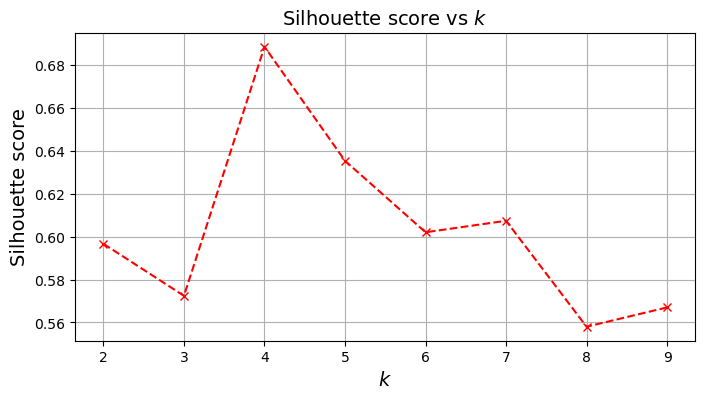

In [13]:
# Comparing silhouette scores for different values of k

silhouette_scores = []
for k in range(2, 10):
	kmeans = KMeans(n_clusters=k, random_state=42)
	kmeans.fit(X)

	silhouette_scores.append(silhouette_score(X, kmeans.labels_))

plt.figure(figsize=(8, 4))
plt.plot(range(2, 10), silhouette_scores, "rx--")

plt.xlabel("$k$")
plt.ylabel("Silhouette score", rotation=90)
plt.title("Silhouette score vs $k$")
plt.grid()

plt.show()

### Limits of k-means

### Using Clustering for Image Segmentation

In [14]:
import urllib.request

homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
filename = "ladybug.png"
filepath = IMAGES_PATH / filename
if not filepath.is_file():
    print("Downloading", filename)
    url = f"{homl3_root}/images/unsupervised_learning/{filename}"
    urllib.request.urlretrieve(url, filepath)

In [15]:
import PIL

image = np.asarray(PIL.Image.open(filepath))
image.shape

(533, 800, 3)

In [16]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters=8, n_init=10, random_state=42).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

In [17]:
segmented_imgs = []

n_colors = (20, 15, 10, 8, 6, 5, 4, 2)
for n_clusters in n_colors:
	kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init='auto').fit(X)
	segmented_img = kmeans.cluster_centers_[kmeans.labels_]
	segmented_imgs.append(segmented_img.reshape(image.shape))

c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ismae\.conda\envs\homl3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

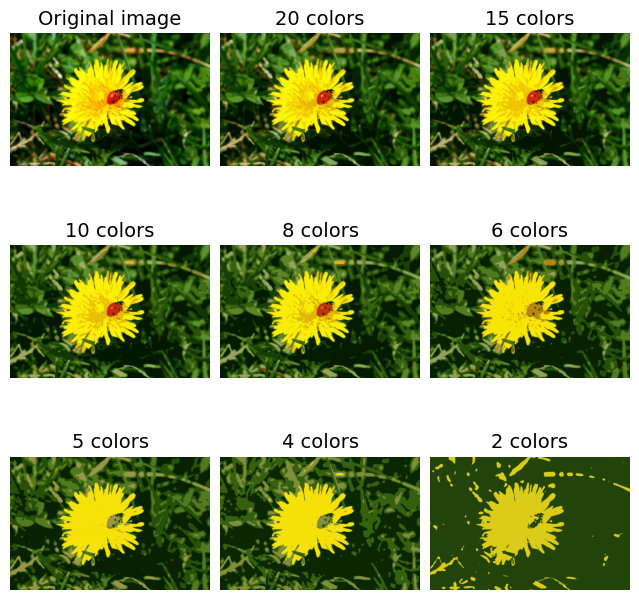

In [18]:
plt.figure(figsize=(8, 8))
plt.subplots_adjust(wspace=0.05, hspace=0.1)

plt.subplot(331)
plt.imshow(image)
plt.title("Original image")
plt.axis('off')

for idx, n_clusters in enumerate(n_colors):
	plt.subplot(3, 3, idx+2)
	plt.imshow(segmented_imgs[idx]/255)
	plt.title(f"{n_clusters} colors")
	plt.axis('off')

### Using Clustering for Semi-supervised Learning

In [36]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y=True)

idx_split = 1400
X_train, y_train = X_digits[:idx_split], y_digits[:idx_split]
X_test, y_test = X_digits[idx_split:], y_digits[idx_split:]

In [37]:
# Suppose we only have n labeled instances
# Using a Logistic Regression to get baseline performance
from sklearn.linear_model import LogisticRegression

n_labeled = 50
log_reg = LogisticRegression(max_iter = 10_000, random_state=42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

# Getting the accuracy (on the test set)
print(f"Accuracy with {n_labeled} labeled instances:")
print(log_reg.score(X_test, y_test))

# 0.7581863979848866

Accuracy with 50 labeled instances:
0.7481108312342569


In [ ]:
# If we had all the labels
log_reg_all_labels = LogisticRegression(max_iter = 10_000, random_state=42)
log_reg_all_labels.fit(X_train, y_train)
print("Accuracy with all labels:")
print(log_reg_all_labels.score(X_test, y_test))
# 0.906801007556675

Accuracy with all labels:
0.906801007556675


In [176]:
# Using KMeans to get more labels

# First we want to get the '50 representative images' - images closest to the centroids

np.random.seed(42)
k = 50
kmeans = KMeans(n_clusters=k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis=0)
X_representative_digits = X_train[representative_digit_idx]

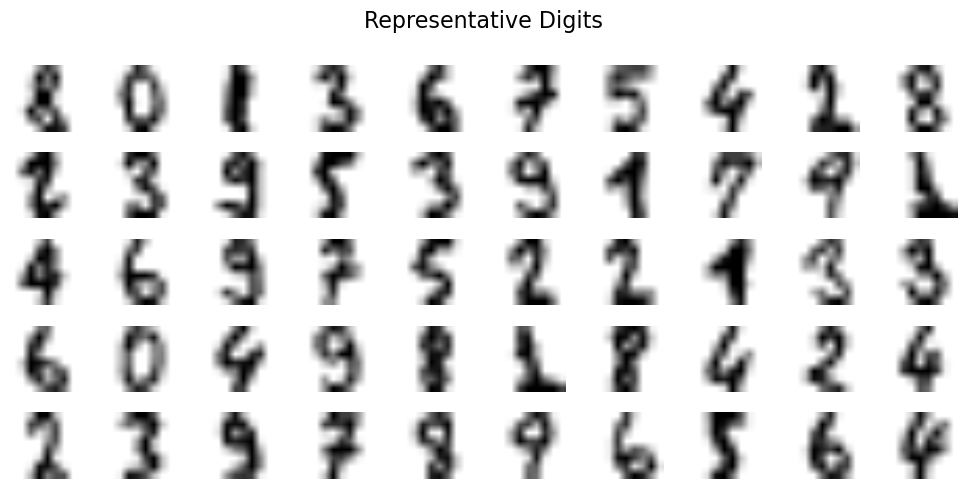

In [177]:
# Visualizing the representative digits
plt.figure(figsize=(10, 5))
for idx, digit in enumerate(X_representative_digits):
    plt.subplot(5, 10, idx + 1)
    plt.imshow(digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis("off")
plt.suptitle("Representative Digits", fontsize=16)
plt.tight_layout()
plt.show()

In [178]:
# Labeling the representative digits manually

y_representative_digits = np.array([
    8, 0, 1, 3, 6, 7, 5, 4, 2, 8,
    2, 3, 9, 5, 3, 9, 1, 7, 9, 1,
    4, 6, 9, 7, 5, 2, 2, 1, 3, 3,
    6, 0, 4, 9, 8, 1, 8, 4, 2, 4,
    2, 3, 9, 7, 8, 9, 6, 5, 6, 4,
])

In [179]:
# Now we can retrain the model using the representative digits and their labels
log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)

print("Accuracy with representative digits:")
print(log_reg.score(X_test, y_test))

# 0.8488664987405542 
# Much better performance than with 50 random labeled instances

Accuracy with representative digits:
0.8488664987405542


In [180]:
# Let's try propagating the labels to the other instances in the same cluster

y_train_propagated = np.empty(len(X_train), dtype=np.int64)
for i in range(k):
    y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_train, y_train_propagated)

print("Accuracy with propagated labels:")
print(log_reg.score(X_test, y_test))

# 0.871536523929471
# Better performance again

Accuracy with propagated labels:
0.871536523929471


In [181]:
# Removing the 1% most distant to the centroids

percentile_closest = 65

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
    in_cluster = (kmeans.labels_ == i)
    cluster_dist = X_cluster_dist[in_cluster]
    cutoff_distance = np.percentile(cluster_dist, percentile_closest)
    above_cutoff = (X_cluster_dist > cutoff_distance)
    X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

In [182]:
log_reg = LogisticRegression(max_iter=10_000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.8790931989924433

In [183]:
# Accuracy of propagated labels:
(y_train_partially_propagated == y_train[partially_propagated]).mean()
# 0.96

0.9878587196467992

## DBSCAN

In [184]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)
dbscan = DBSCAN(eps=0.05, min_samples=5)
dbscan.fit(X)

DBSCAN(eps=0.05)

In [185]:
dbscan.labels_[:10]

array([ 0,  2, -1, -1,  1,  0,  0,  0,  2,  5], dtype=int64)

In [186]:
dbscan.core_sample_indices_[:20]

array([ 0,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21,
       22, 23, 24], dtype=int64)

In [187]:
dbscan.components_[:10]

array([[-0.02137124,  0.40618608],
       [-0.84192557,  0.53058695],
       [ 0.58930337, -0.32137599],
       [ 0.29248724, -0.20696309],
       [-0.02637836,  0.44766267],
       [ 1.6201408 , -0.28758856],
       [ 1.26718285, -0.40793471],
       [ 0.87418608,  0.50781041],
       [ 0.3322007 , -0.19032202],
       [ 1.952812  ,  0.22552333]])

In [188]:
def plot_dbscan_results(X, labels):
    """
    Plots the results of DBSCAN clustering.

    Parameters:
    - X: numpy.ndarray, the dataset used for clustering.
    - labels: numpy.ndarray, the cluster labels assigned by DBSCAN.
    """
    plt.figure(figsize=(8, 6))

    # Plot the points with their cluster labels
    unique_labels = set(labels)
    for label in unique_labels:
        if label == -1:
            # Anomaly points
            color = 'k'
            marker = 'x'
            label_name = "Anomaly"
        else:
            # Cluster points
            color = plt.cm.jet(float(label) / max(unique_labels))
            marker = 'o'
            label_name = f"Cluster {label}"
        
        plt.scatter(X[labels == label, 0], X[labels == label, 1], 
                    c=[color], marker=marker, label=label_name, s=10)

    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)
    plt.title("DBSCAN Clustering Results")
    plt.legend(loc="best", markerscale=2)
    plt.grid()
    plt.show()

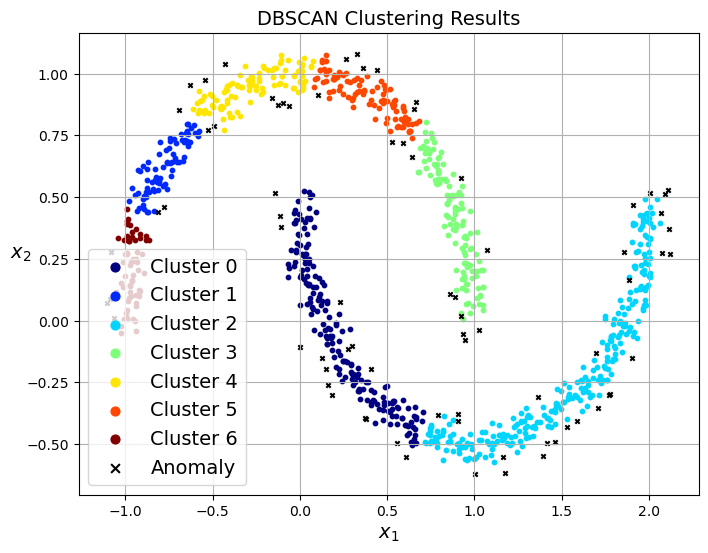

In [189]:
plot_dbscan_results(X, dbscan.labels_)

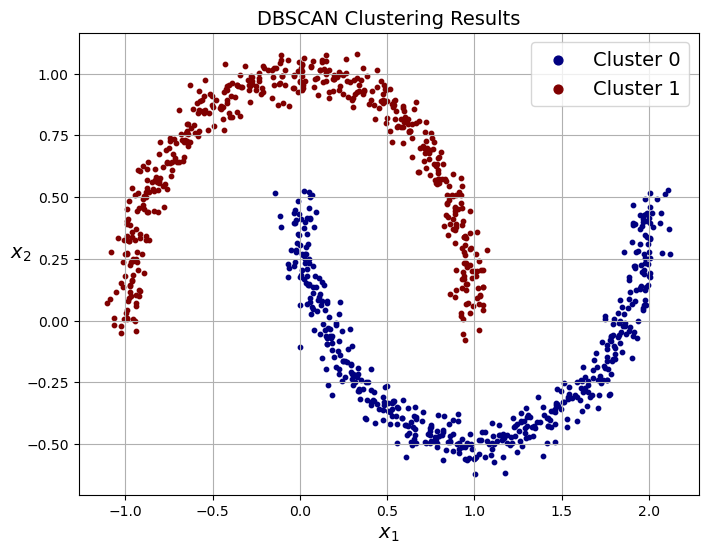

In [190]:
# Changing dbscan parameters
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan.fit(X)

plot_dbscan_results(X, dbscan.labels_)
# Much better result

DBSCAN does not have a .predict() method. However, we can implement this easily choosing our prefered algorithm.
For KNClassifier, for example:

In [191]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

In [192]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([1, 0, 1, 0], dtype=int64)

In [193]:
knn.predict_proba(X_new)

array([[0.18, 0.82],
       [1.  , 0.  ],
       [0.12, 0.88],
       [1.  , 0.  ]])

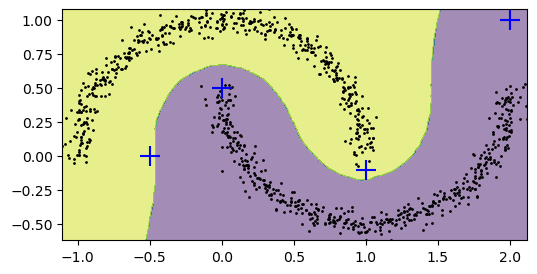

In [194]:
plt.figure(figsize=(6, 3))
plot_decision_boundaries(knn, X, show_centroids=False)
plt.scatter(X_new[:, 0], X_new[:, 1], c="b", marker="+", s=200, zorder=10)
plt.show()

## Other Clustering Algorithms

## Gaussian Mixtures